<a href="https://colab.research.google.com/github/ghoshal7/Bank_Check_Segmentation/blob/main/yolov5_signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd /content/yolov5
%pip install -r requirements.txt # install dependencies

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 13322, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 13322 (delta 88), reused 104 (delta 72), pack-reused 13198
Receiving objects: 100% (13322/13322), 13.22 MiB | 18.52 MiB/s, done.
Resolving deltas: 100% (9152/9152), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 15.9 MB/s 
Setup complete. Using torch 1.12.1+cu113 (CPU)


In [52]:
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data BCSD_signature.yaml --weights yolov5s.pt --cache

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=BCSD_signature.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-185-ge4398cf Python-3.7.14 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

/content/yolov5/runs/train/exp3


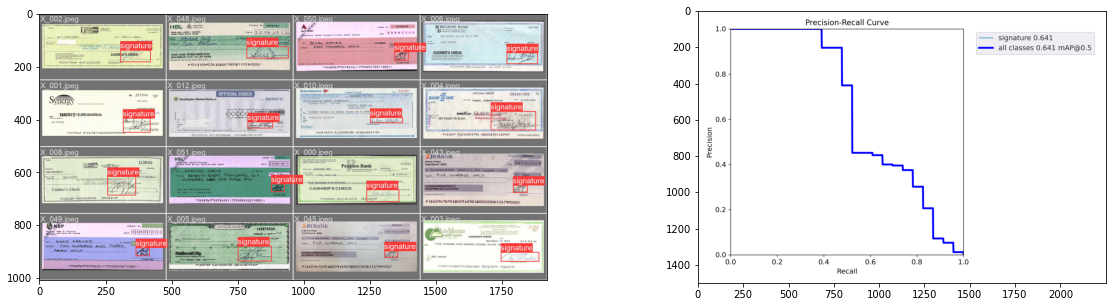

In [53]:
%cd /content/yolov5/runs/train/exp3

import matplotlib.pyplot as plt

labels_valid = plt.imread('val_batch0_labels.jpg')
PR = plt.imread('PR_curve.png')


f, axs = plt.subplots(1,2,figsize = (20,5))

axs[0].imshow(labels_valid)
axs[1].imshow(PR)
plt.show()

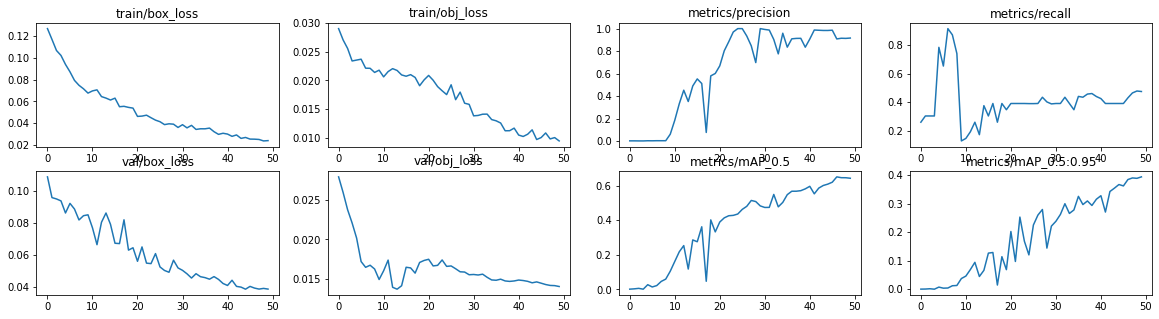

In [54]:
import pandas as pd
metrics = pd.read_csv('results.csv')
colnames_wspace = metrics.columns
colnames_wospace = [i.strip(' ') for i in colnames_wspace]
metrics.columns = colnames_wospace
f, axs = plt.subplots(2,4,figsize = (20,5))
axs[0][0].plot(metrics['epoch'], metrics['train/box_loss'], '-'); axs[0][0].set_title('train/box_loss')
axs[0][1].plot(metrics['epoch'], metrics['train/obj_loss'], '-'); axs[0][1].set_title('train/obj_loss')
axs[0][2].plot(metrics['epoch'], metrics['metrics/precision'], '-'); axs[0][2].set_title('metrics/precision')
axs[0][3].plot(metrics['epoch'], metrics['metrics/recall'], '-'); axs[0][3].set_title('metrics/recall')

axs[1][0].plot(metrics['epoch'], metrics['val/box_loss'], '-'); axs[1][0].set_title('val/box_loss')
axs[1][1].plot(metrics['epoch'], metrics['val/obj_loss'], '-'); axs[1][1].set_title('val/obj_loss')
axs[1][2].plot(metrics['epoch'], metrics['metrics/mAP_0.5'], '-'); axs[1][2].set_title('metrics/mAP_0.5')
axs[1][3].plot(metrics['epoch'], metrics['metrics/mAP_0.5:0.95'], '-'); axs[1][3].set_title('metrics/mAP_0.5:0.95')

plt.show()

In [55]:
%cd /content/yolov5
# !python test.py --data BCSD_signature.yaml --weights best.pt
!python detect.py --weights runs/train/exp3/weights/best.pt --source data/test/images

/content/yolov5
detect: weights=['runs/train/exp3/weights/best.pt'], source=data/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-185-ge4398cf Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/29 /content/yolov5/data/test/images/X_013.jpeg: 288x640 1 signature, 217.0ms
image 2/29 /content/yolov5/data/test/images/X_014.jpeg: 288x640 (no detections), 178.3ms
image 3/29 /content/yolov5/data/test/images/X_015.jpeg: 320x640 (no detections), 204.7ms
image 4/29 /content/yolov5/data/test/images/X_016.jpeg: 288x640 (no detections), 171.7ms
imag

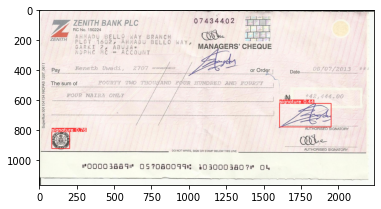

In [57]:
import os, random
import numpy as np
from PIL import Image
detections_dir = "/content/yolov5/runs/detect/exp6/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))
plt.show()

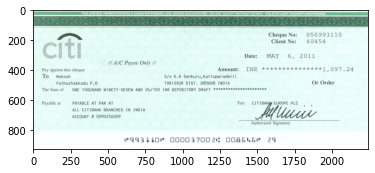

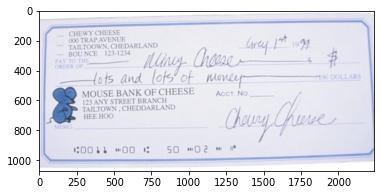

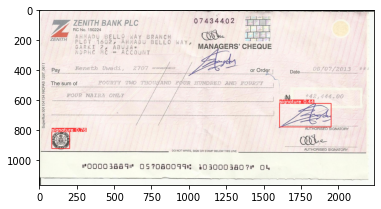

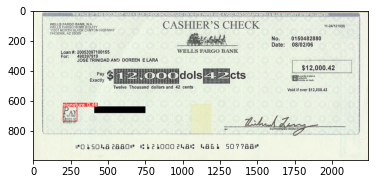

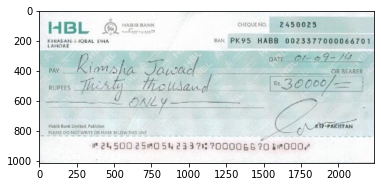

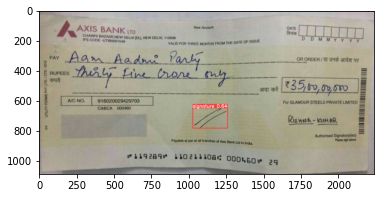

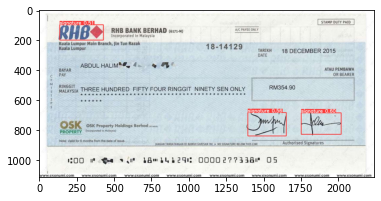

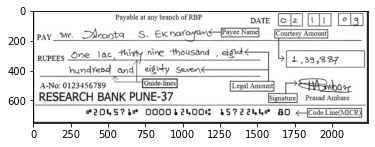

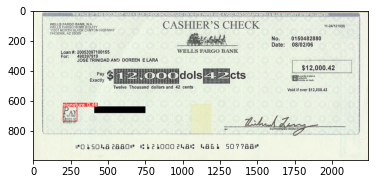

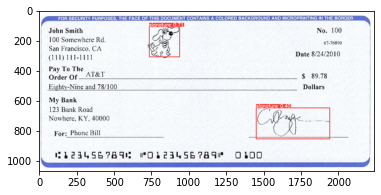

In [59]:
for i in range(10):
  random_detection_image = Image.open(random.choice(detection_images))
  plt.imshow(np.array(random_detection_image))
  plt.show()